In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_NL_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,2,...,0,0.0,0.0,0.0,0,0.0,0,0.0,2.0,0.0
1,1.0,1.0,2.0,0.0,0.0,0.0,3.0,0.0,3.0,0,...,0,0.0,0.0,0.0,0,2.0,2,2.0,0.0,7.0
2,2.0,2.0,1.0,0.0,0.0,NaN,3.0,0.0,2.0,0,...,0,0.0,0.0,2.0,0,3.0,3,2.0,0.0,7.0
3,2.0,2.0,2.0,1.0,0.0,0.0,2.0,0.0,2.0,2,...,0,0.0,0.0,NaN,0,2.0,2,2.0,0.0,7.0
4,2.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0,...,0,0.0,0.0,3.0,0,2.0,2,2.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0,...,0,0.0,0.0,3.0,0,0.0,0,3.0,0.0,70.0
354,2.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,2,...,0,0.0,0.0,0.0,0,0.0,0,1.0,0.0,NaN
355,2.0,2.0,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0,...,0,0.0,0.0,2.0,0,0.0,0,2.0,0.0,70.0
356,2.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0.0,0.0,0.0,0,0.0,0,1.0,0.0,70.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	6
float64		column 2	6
float64		column 3	6
float64		column 4	3
float64		column 5	6
float64		column 6	6
float64		column 7	3
float64		column 8	3
float64		column 9	3
int64		column 10	0
int64		column 11	0
int64		column 12	0
int64		column 13	0
int64		column 14	0
float64		column 15	6
int64		column 16	0
float64		column 17	3
int64		column 18	0
float64		column 19	3
float64		column 20	6
int64		column 21	0
float64		column 22	3
float64		column 23	3
float64		column 24	6
int64		column 25	0
float64		column 26	3
float64		column 27	3
float64		column 28	6
int64		column 29	0
float64		column 30	3
int64		column 31	0
float64		column 32	3
float64		column 33	3
float64		column 34	3


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,352.000000,352.000000,352.000000,355.000000,352.000000,352.000000,355.000000,355.000000,355.000000,358.000000,...,358.000000,355.000000,355.000000,352.000000,358.000000,355.000000,358.000000,355.000000,355.000000,355.000000
mean,2.073864,1.806818,1.562500,1.357746,0.627841,0.451705,0.171831,0.377465,0.619718,0.530726,...,0.399441,0.478873,0.453521,0.948864,0.458101,0.107042,0.117318,1.881690,0.554930,36.214085
std,0.662550,0.689489,0.897329,1.136908,0.899901,0.959551,0.578617,0.836018,0.985290,0.912352,...,0.856479,0.874290,0.956664,1.131118,0.959796,0.457000,0.493863,0.699134,1.104279,15.256908
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.500000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


<AxesSubplot:>

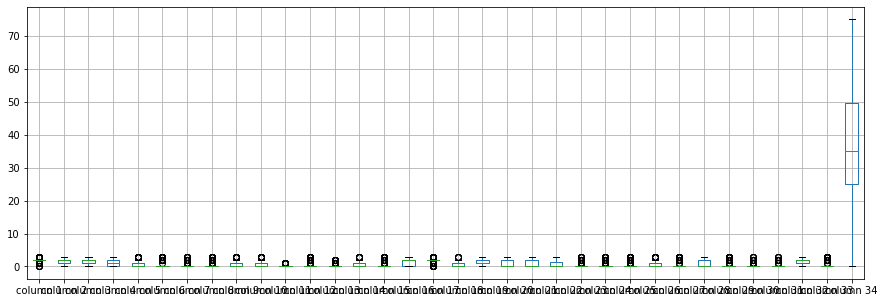

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      2.073864
column 2      1.806818
column 3      1.562500
column 4      1.357746
column 5      0.627841
column 6      0.451705
column 7      0.171831
column 8      0.377465
column 9      0.619718
column 10     0.530726
column 11     0.122905
column 12     0.410615
column 13     0.142458
column 14     0.547486
column 15     0.306818
column 16     1.368715
column 17     1.957746
column 18     0.511173
column 19     1.292958
column 20     0.659091
column 21     0.983240
column 22     0.639437
column 23     0.301408
column 24     0.352273
column 25     0.399441
column 26     0.478873
column 27     0.453521
column 28     0.948864
column 29     0.458101
column 30     0.107042
column 31     0.117318
column 32     1.881690
column 33     0.554930
column 34    36.214085
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.438319,0.273342,-0.034159,-0.016420,0.029121,-0.130592,-0.028807,0.128402,0.174826,...,-0.017768,0.171107,0.002100,0.036115,-0.009408,-0.035424,-0.025073,0.092740,-0.008229,0.001130
column 2,0.438319,1.000000,0.357932,-0.075505,-0.012424,-0.070119,-0.101086,-0.088237,0.286772,0.294527,...,-0.092858,0.208240,-0.113013,0.018479,-0.121121,-0.014381,-0.015657,-0.004048,-0.138983,0.023850
column 3,0.273342,0.357932,1.000000,-0.070253,0.244784,0.306650,-0.177603,0.263371,0.310915,0.282063,...,0.274620,0.359477,0.268391,-0.261866,0.251017,-0.093226,-0.131540,0.134124,0.258671,0.141966
column 4,-0.034159,-0.075505,-0.070253,1.000000,0.275641,0.409993,-0.149240,0.355904,-0.292387,-0.147817,...,0.369655,-0.188472,0.362384,-0.002252,0.380163,-0.177285,-0.185539,0.053302,0.390435,0.056363
column 5,-0.016420,-0.012424,0.244784,0.275641,1.000000,0.371669,-0.175169,0.376045,-0.073427,0.012439,...,0.394691,-0.012306,0.359603,0.006916,0.373387,-0.151477,-0.167695,0.098177,0.375623,0.077097
column 6,0.029121,-0.070119,0.306650,0.409993,0.371669,1.000000,-0.137320,0.860207,-0.274815,-0.259457,...,0.883281,-0.124476,0.910342,0.093658,0.893666,-0.092259,-0.107870,0.254698,0.901765,0.102345
column 7,-0.130592,-0.101086,-0.177603,-0.149240,-0.175169,-0.137320,1.000000,-0.135776,0.225033,-0.006103,...,-0.122559,-0.164781,-0.142574,-0.021140,-0.142876,0.784764,0.844641,-0.097292,-0.137869,-0.374110
column 8,-0.028807,-0.088237,0.263371,0.355904,0.376045,0.860207,-0.135776,1.000000,-0.285940,-0.263450,...,0.883999,-0.111220,0.889795,0.128477,0.872600,-0.084870,-0.108037,0.271672,0.887914,0.118940
column 9,0.128402,0.286772,0.310915,-0.292387,-0.073427,-0.274815,0.225033,-0.285940,1.000000,0.657317,...,-0.266519,0.487369,-0.286702,-0.427290,-0.279218,0.234736,0.260039,-0.081599,-0.273510,-0.104137
column 10,0.174826,0.294527,0.282063,-0.147817,0.012439,-0.259457,-0.006103,-0.263450,0.657317,1.000000,...,-0.261302,0.483877,-0.253627,-0.432356,-0.262429,-0.054331,-0.020456,0.024197,-0.251055,0.026342


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+12,34+12+12,34+12+12+12,34+12+12+12+12,34+12+12+12+12+12,34+12+12+12+12+12+12,34+12+12+12+12+12+12+12,34+12+12+12+12+12+12,34+12+12+12+12+12,34+12+12+12+12,34+12+12+12,34+12+12,34+12,34], vae_layer = False, seed = 12)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 75.99655324762517
Epoch: 1 , loss: 75.95570789683948
Epoch: 2 , loss: 75.87039149891247
Epoch: 3 , loss: 75.73613773692738
Epoch: 4 , loss: 75.68424779718572
Epoch: 5 , loss: 75.44746017456055
Epoch: 6 , loss: 75.57466957785867
Epoch: 7 , loss: 74.85477239435369
Epoch: 8 , loss: 74.12253085049716
Epoch: 9 , loss: 72.16476821899414
Epoch: 10 , loss: 69.29176035794345
Epoch: 11 , loss: 68.20685126564719
Epoch: 12 , loss: 67.80001258850098
Epoch: 13 , loss: 67.05025707591663
Epoch: 14 , loss: 66.51749697598544
Epoch: 15 , loss: 66.36258107965642
Epoch: 16 , loss: 66.39377854087137
Epoch: 17 , loss: 66.09907947887073
Epoch: 18 , loss: 65.91427629644221
Epoch: 19 , loss: 65.61731824007902
Epoch: 20 , loss: 65.48704286055131
Epoch: 21 , loss: 65.37034502896395
Epoch: 22 , loss: 65.23685264587402
Epoch: 23 , loss: 65.24118787592107
Epoch: 24 , loss: 64.96131324768066
Epoch: 25 , loss: 64.37951850891113
Epoch:

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.000000
column 2      1.000000
column 3      1.000000
column 4      1.000000
column 5      0.000000
column 6      0.000000
column 7      2.000000
column 8      0.000000
column 9      3.000000
column 10     2.000000
column 11     0.000000
column 12     0.000000
column 13     0.000000
column 14     1.000000
column 15     0.000000
column 16     1.000000
column 17     1.000000
column 18     1.000000
column 19     1.000000
column 20     0.000000
column 21     0.000000
column 22     0.000000
column 23     0.183342
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30     0.000000
column 31     1.000000
column 32     1.000000
column 33     1.000000
column 34    12.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0,...,0,0.0,0.0,0.000000,0,0.0,0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0,...,0,0.0,0.0,0.000000,0,0.0,0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.000000,0.0,0.240807,0.0,0.0,0.0,0,...,0,0.0,0.0,0.000000,0,0.0,0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0,...,0,0.0,0.0,-1.393961,0,0.0,0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0,...,0,0.0,0.0,0.000000,0,0.0,0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0,...,0,0.0,0.0,0.000000,0,0.0,0,0.0,0.0,0.000000
354,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0,...,0,0.0,0.0,0.000000,0,0.0,0,0.0,0.0,-68.476872
355,0.0,0.0,0.0,-0.369079,0.0,0.000000,0.0,0.0,0.0,0,...,0,0.0,0.0,0.000000,0,0.0,0,0.0,0.0,0.000000
356,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0,...,0,0.0,0.0,0.000000,0,0.0,0,0.0,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(84.31441633147733, 758.0725558942231)

In [17]:
NRMS=numerator/denominator
NRMS


0.11122209302514581

In [18]:
new_df.iloc[66,:]

column 1      2.0
column 2      0.0
column 3      0.0
column 4      3.0
column 5      0.0
column 6      0.0
column 7      0.0
column 8      0.0
column 9      0.0
column 10     0.0
column 11     0.0
column 12     0.0
column 13     0.0
column 14     0.0
column 15     2.0
column 16     2.0
column 17     2.0
column 18     0.0
column 19     0.0
column 20     0.0
column 21     3.0
column 22     0.0
column 23     0.0
column 24     0.0
column 25     0.0
column 26     0.0
column 27     0.0
column 28     0.0
column 29     0.0
column 30     0.0
column 31     0.0
column 32     2.0
column 33     0.0
column 34    22.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,1.0,1.0,1.000000,1.0,0.000000,0.0,0.0,2.0,2,...,0,0.0,0.0,0.000000,0,0.0,0,0.0,2.0,0.000000
1,1.0,1.0,2.0,0.000000,0.0,0.000000,3.0,0.0,3.0,0,...,0,0.0,0.0,0.000000,0,2.0,2,2.0,0.0,7.000000
2,2.0,2.0,1.0,0.000000,0.0,0.240807,3.0,0.0,2.0,0,...,0,0.0,0.0,2.000000,0,3.0,3,2.0,0.0,7.000000
3,2.0,2.0,2.0,1.000000,0.0,0.000000,2.0,0.0,2.0,2,...,0,0.0,0.0,0.606039,0,2.0,2,2.0,0.0,7.000000
4,2.0,2.0,1.0,0.000000,0.0,0.000000,2.0,0.0,2.0,0,...,0,0.0,0.0,3.000000,0,2.0,2,2.0,0.0,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2.0,2.0,0.0,2.000000,1.0,0.000000,0.0,0.0,0.0,0,...,0,0.0,0.0,3.000000,0,0.0,0,3.0,0.0,70.000000
354,2.0,3.0,2.0,0.000000,0.0,0.000000,0.0,0.0,3.0,2,...,0,0.0,0.0,0.000000,0,0.0,0,1.0,0.0,1.523128
355,2.0,2.0,2.0,0.630921,0.0,0.000000,0.0,0.0,0.0,0,...,0,0.0,0.0,2.000000,0,0.0,0,2.0,0.0,70.000000
356,2.0,1.0,0.0,3.000000,0.0,0.000000,0.0,0.0,0.0,0,...,0,0.0,0.0,0.000000,0,0.0,0,1.0,0.0,70.000000


In [20]:
imputations[-1].to_excel("DERM_NL_1(imp).xlsx", index=False, header=False)